# 2023

## NEM jóvenes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Trabajando con el nem de los jóvenes
df_jovenes2023 = pd.read_csv("NEM2023.csv", header=0, sep=";", encoding = "utf-8")
columnas_a_convertir = ["RBD", "COD_DEPE", "AGNO_EGRESO", "MRUN", "PERCENTIL"]
for i in columnas_a_convertir:
    df_jovenes2023[i] = df_jovenes2023[i].astype(str)

df_jovenes2023["NEM"] = df_jovenes2023["NEM"].str.replace(",", ".").astype(float)
df_jovenes2023

quantiles_jovenes2023 = df_jovenes2023.groupby("RBD")["NEM"].quantile([0.25, 0.5, 0.75]).unstack()
# Renombrando las columnas de los quantiles
quantiles_jovenes2023.columns = ['25th_jovenes', '50th_jovenes', '75th_jovenes']
df_jovenes2023 = df_jovenes2023.merge(quantiles_jovenes2023, left_on="RBD", right_index=True, suffixes=("", "_quantiles"))
df_jovenes2023["Outlier"] = np.where((df_jovenes2023["NEM"] < df_jovenes2023["25th_jovenes"] - 1.5 * (df_jovenes2023["75th_jovenes"] - df_jovenes2023["25th_jovenes"])), 1, 0)
print(df_jovenes2023.describe())
print(df_jovenes2023["Outlier"].value_counts())

                 NEM   25th_jovenes   50th_jovenes   75th_jovenes  \
count  212887.000000  212887.000000  212887.000000  212887.000000   
mean        5.939064       5.602673       5.940954       6.283580   
std         0.537844       0.319531       0.309386       0.268788   
min         4.180000       4.750000       5.000000       5.000000   
25%         5.530000       5.365000       5.700000       6.080000   
50%         5.950000       5.550000       5.915000       6.280000   
75%         6.380000       5.800000       6.150000       6.490000   
max         7.000000       6.790000       6.880000       6.980000   

             Outlier  
count  212887.000000  
mean        0.003189  
std         0.056386  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
Outlier
0    212208
1       679
Name: count, dtype: int64


In [ ]:
# Se contabiliza los outliers en cada grupo
outliers2023 = df_jovenes2023[df_jovenes2023["Outlier"] == 1].groupby("RBD").size().reset_index(name="outliers")

## SEP

In [ ]:
# Se unen los outliers con el dataset original
df_SEP2023 = pd.read_csv("SEP2023.csv", sep=";", encoding="utf-8")
# Convertir otras columnas al tipo de dato especificado
df_SEP2023 = df_SEP2023.astype({
    'AGNO': 'str',
    'RBD': 'str',
    'COD_REG_RBD': 'str',
    'COD_PRO_RBD': 'str',
    'NOM_COM_RBD': 'str',
    'COD_DEPE': 'str',
    'CONVENIO_SEP': 'int64',
    'N_PREF': 'int64',
    'N_PREF_BEN': 'int64',
})

# Filtrar el DataFrame para mantener solo las columnas especificadas
df_SEP2023 = df_SEP2023[[
    'AGNO',
    'RBD',
    'COD_REG_RBD',
    'COD_PRO_RBD',
    'NOM_COM_RBD',
    'COD_DEPE',
    'CONVENIO_SEP',
    'N_PREF',
    'N_PREF_BEN',
]]


# Unir la base de outliers por NEM descrita anteriormente
df_SEP2023 = df_SEP2023.merge(outliers2023, on="RBD", how="left").fillna(0)

# Filtrar los datos para trabajar solamente con la región Metropolitana
df_SEP2023 = df_SEP2023[df_SEP2023['COD_REG_RBD'] == '13']

# Mostrar los resultados
df_SEP2023.head()

,AGNO,RBD,COD_REG_RBD,COD_PRO_RBD,NOM_COM_RBD,COD_DEPE,CONVENIO_SEP,N_PREF,N_PREF_BEN,outliers
4899,2023,8485,13,131,SANTIAGO,2,1,1171,1171,11.0
4900,2023,8487,13,131,SANTIAGO,2,1,855,855,17.0
4901,2023,8488,13,131,SANTIAGO,2,1,59,59,0.0
4902,2023,8489,13,131,SANTIAGO,2,1,96,96,0.0
4903,2023,8490,13,131,SANTIAGO,2,1,94,94,1.0


In [ ]:
print(df_SEP2023.isnull().sum())
print(df_SEP2023["RBD"].nunique())

AGNO            0
RBD             0
COD_REG_RBD     0
COD_PRO_RBD     0
NOM_COM_RBD     0
COD_DEPE        0
CONVENIO_SEP    0
N_PREF          0
N_PREF_BEN      0
outliers        0
dtype: int64
2888


In [ ]:
# Definir las columnas a analizar para outliers
columnas_outliers2023 = ['N_PREF', 'N_PREF_BEN']

# Crear un diccionario para almacenar los resultados de outliers
outliers_info2023 = {}

# Calcular el rango intercuartílico (IQR) y los límites de los outliers para cada columna
for col in columnas_outliers2023:
    Q1 = df_SEP2023[col].quantile(0.25)
    Q3 = df_SEP2023[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers2023 = df_SEP2023[df_SEP2023[col] > upper_bound]
    outliers_info2023[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers2023),
    }

outliers_info2023

{'N_PREF': {'Q1': 16.0,
  'Q3': 139.0,
  'IQR': 123.0,
  'Lower Bound': -168.5,
  'Upper Bound': 323.5,
  'Outliers Count': 234},
 'N_PREF_BEN': {'Q1': 0.0,
  'Q3': 87.0,
  'IQR': 87.0,
  'Lower Bound': -130.5,
  'Upper Bound': 217.5,
  'Outliers Count': 264}}

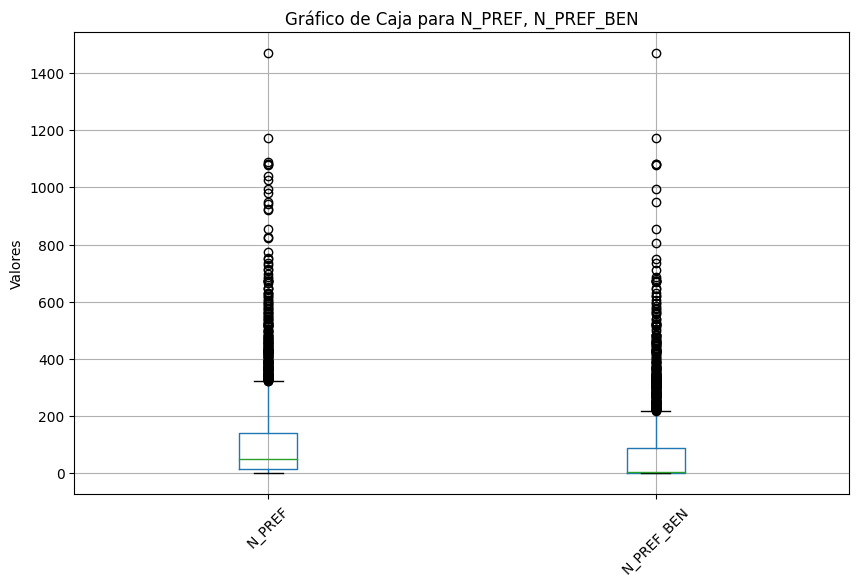

In [ ]:
# Crear un gráfico de caja (boxplot) para las columnas seleccionadas
plt.figure(figsize=(10, 6))
df_SEP2023[['N_PREF', 'N_PREF_BEN']].boxplot()
plt.title('Gráfico de Caja para N_PREF, N_PREF_BEN 2023')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

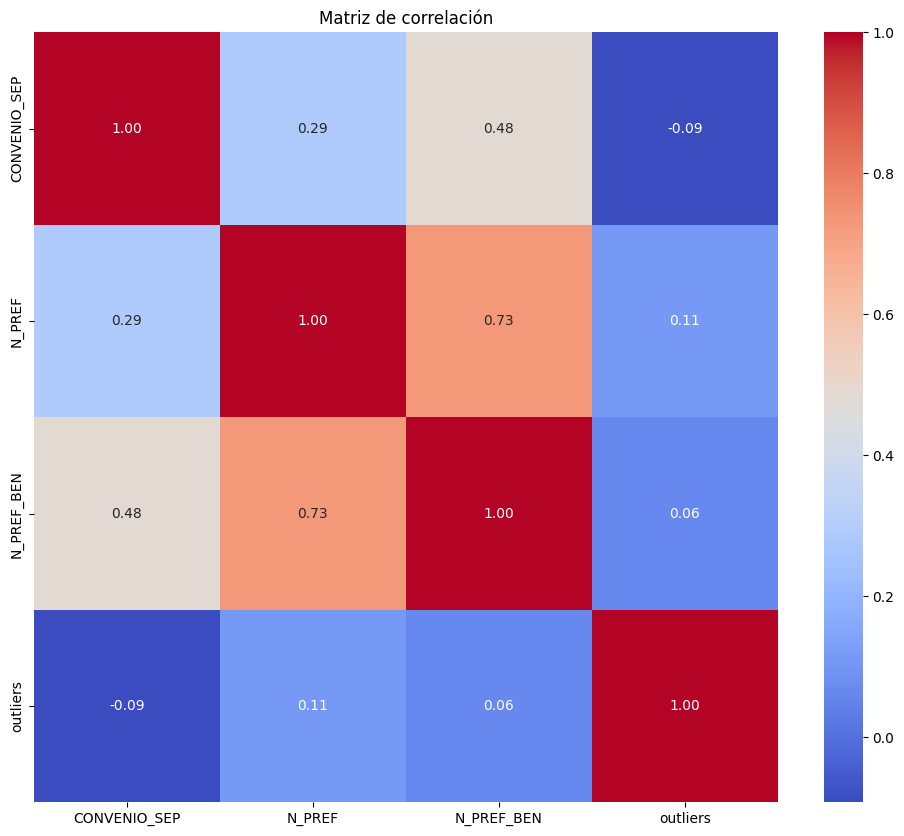

In [ ]:
import seaborn as sns

# Seleccionar las columnas numéricas
numeric_df_SEP2023 = df_SEP2023.select_dtypes(include=np.number)

# Calcular la matriz de correlación
corr_matrix2023 = numeric_df_SEP2023.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix2023, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación 2023')
plt.show()


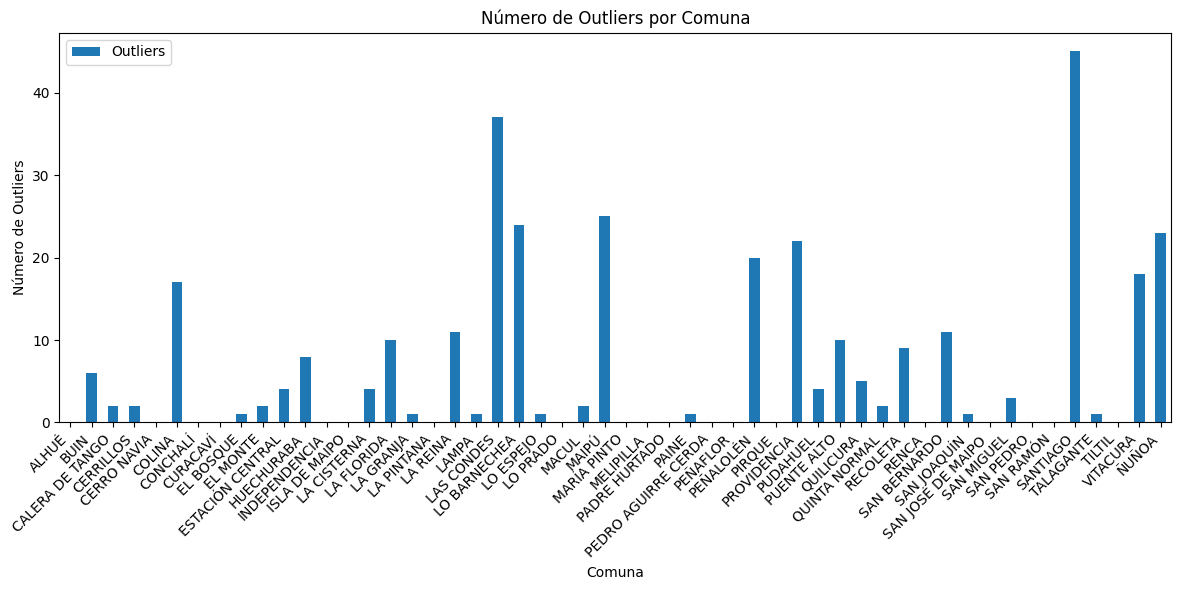

In [ ]:
outliers_grouped2023 = df_SEP2023.groupby("NOM_COM_RBD")[["outliers"]].sum()
outliers_grouped2023.plot(kind="bar", stacked=False, figsize=(12, 6))
plt.xlabel("Comuna")
plt.ylabel("Número de Outliers")
plt.title("Número de Outliers por Comuna 2023")
plt.legend(["Outliers"])

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar que las etiquetas se corten
plt.tight_layout()

plt.show()

In [ ]:
# Filtrar los colegios con al menos un 'N_PREF_BEN' y al menos un outlier en jóvenes
colegios_con_outliers2023 = df_SEP2023[
    (df_SEP2023['N_PREF_BEN'] > 0) &
    ((df_SEP2023['outliers'] > 0))
]['RBD'].nunique()

# Total de colegios con al menos un 'N_PREF'
total_colegios_con_N_PREF2023 = df_SEP2023[df_SEP2023['N_PREF'] > 0]['RBD'].nunique()

# Calcular la fracción del total de colegios con al menos un 'N_PREF' que tienen al menos un outlier
fraccion_colegios_con_outliers2023 = colegios_con_outliers2023 / total_colegios_con_N_PREF2023

# Mostrar resultados
print(f"Colegios con al menos un 'N_PREF' y un outlier: {colegios_con_outliers2023}")
print(f"Total de colegios con al menos un 'N_PREF': {total_colegios_con_N_PREF2023}")
print(f"Fracción de colegios con outliers: {fraccion_colegios_con_outliers2023:.2%}")



Colegios con al menos un 'N_PREF' y un outlier: 39
Total de colegios con al menos un 'N_PREF': 2875
Fracción de colegios con outliers: 1.36%


# 2022

## NEM jóvenes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Trabajando con el nem de los jóvenes
df_jovenes2022 = pd.read_csv("nem_jovenes2022.csv", header=0, sep=";", encoding = "utf-8")
columnas_a_convertir = ["RBD", "COD_DEPE", "AGNO_EGRESO", "MRUN", "PERCENTIL"]
for i in columnas_a_convertir:
    df_jovenes2022[i] = df_jovenes2022[i].astype(str)

df_jovenes2022["NEM"] = df_jovenes2022["NEM"].str.replace(",", ".").astype(float)
df_jovenes2022

quantiles_jovenes2022 = df_jovenes2022.groupby("RBD")["NEM"].quantile([0.25, 0.5, 0.75]).unstack()
# Renombrando las columnas de los quantiles
quantiles_jovenes2022.columns = ['25th_jovenes', '50th_jovenes', '75th_jovenes']
df_jovenes2022 = df_jovenes2022.merge(quantiles_jovenes2022, left_on="RBD", right_index=True, suffixes=("", "_quantiles"))
df_jovenes2022["Outlier"] = np.where((df_jovenes2022["NEM"] < df_jovenes2022["25th_jovenes"] - 1.5 * (df_jovenes2022["75th_jovenes"] - df_jovenes2022["25th_jovenes"])), 1, 0)
print(df_jovenes2022.describe())
print(df_jovenes2022["Outlier"].value_counts())

                 NEM   25th_jovenes   50th_jovenes   75th_jovenes  \
count  211328.000000  211328.000000  211328.000000  211328.000000   
mean        5.908039       5.574448       5.904065       6.246586   
std         0.536627       0.326859       0.314241       0.272292   
min         4.050000       4.480000       4.480000       4.480000   
25%         5.500000       5.330000       5.680000       6.045000   
50%         5.930000       5.530000       5.880000       6.250000   
75%         6.330000       5.762500       6.115000       6.450000   
max         7.000000       6.850000       6.900000       6.980000   

             Outlier  
count  211328.000000  
mean        0.003478  
std         0.058872  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
Outlier
0    210593
1       735
Name: count, dtype: int64


In [ ]:
# Se contabiliza los outliers en cada grupo
outliers2022 = df_jovenes2022[df_jovenes2022["Outlier"] == 1].groupby("RBD").size().reset_index(name="outliers")

## SEP

In [ ]:
# Se unen los outliers con el dataset original
df_SEP2022 = pd.read_csv("SEP2022.csv", sep=";", encoding="utf-8")
# Convertir otras columnas al tipo de dato especificado
df_SEP2022 = df_SEP2022.astype({
    'AGNO': 'str',
    'RBD': 'str',
    'COD_REG_RBD': 'str',
    'COD_PRO_RBD': 'str',
    'NOM_COM_RBD': 'str',
    'COD_DEPE': 'str',
    'CONVENIO_SEP': 'int64',
    'N_PREF': 'int64',
    'N_PREF_BEN': 'int64',
})

# Filtrar el DataFrame para mantener solo las columnas especificadas
df_SEP2022 = df_SEP2022[[
    'AGNO',
    'RBD',
    'COD_REG_RBD',
    'COD_PRO_RBD',
    'NOM_COM_RBD',
    'COD_DEPE',
    'CONVENIO_SEP',
    'N_PREF',
    'N_PREF_BEN',
]]


# Unir la base de outliers por NEM descrita anteriormente
df_SEP2022 = df_SEP2022.merge(outliers2022, on="RBD", how="left").fillna(0)

# Filtrar los datos para trabajar solamente con la región Metropolitana
df_SEP2022 = df_SEP2022[df_SEP2022['COD_REG_RBD'] == '13']

# Mostrar los resultados
df_SEP2022.head()

,AGNO,RBD,COD_REG_RBD,COD_PRO_RBD,NOM_COM_RBD,COD_DEPE,CONVENIO_SEP,N_PREF,N_PREF_BEN,outliers
4955,2022,8485,13,131,SANTIAGO,2,1,1496,1496,14.0
4956,2022,8487,13,131,SANTIAGO,2,1,930,930,11.0
4957,2022,8488,13,131,SANTIAGO,2,1,106,106,0.0
4958,2022,8489,13,131,SANTIAGO,2,1,153,153,0.0
4959,2022,8490,13,131,SANTIAGO,2,1,114,114,0.0


In [ ]:
print(df_SEP2022.isnull().sum())
print(df_SEP2022["RBD"].nunique())

AGNO            0
RBD             0
COD_REG_RBD     0
COD_PRO_RBD     0
NOM_COM_RBD     0
COD_DEPE        0
CONVENIO_SEP    0
N_PREF          0
N_PREF_BEN      0
outliers        0
dtype: int64
2895


In [ ]:
# Definir las columnas a analizar para outliers
columnas_outliers2022 = ['N_PREF', 'N_PREF_BEN']

# Crear un diccionario para almacenar los resultados de outliers
outliers_info2022 = {}

# Calcular el rango intercuartílico (IQR) y los límites de los outliers para cada columna
for col in columnas_outliers2022:
    Q1 = df_SEP2022[col].quantile(0.25)
    Q3 = df_SEP2022[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers2022 = df_SEP2022[df_SEP2022[col] > upper_bound]
    outliers_info2022[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers2022),
    }

outliers_info2022

{'N_PREF': {'Q1': 17.0,
  'Q3': 153.0,
  'IQR': 136.0,
  'Lower Bound': -187.0,
  'Upper Bound': 357.0,
  'Outliers Count': 223},
 'N_PREF_BEN': {'Q1': 0.0,
  'Q3': 98.0,
  'IQR': 98.0,
  'Lower Bound': -147.0,
  'Upper Bound': 245.0,
  'Outliers Count': 267}}

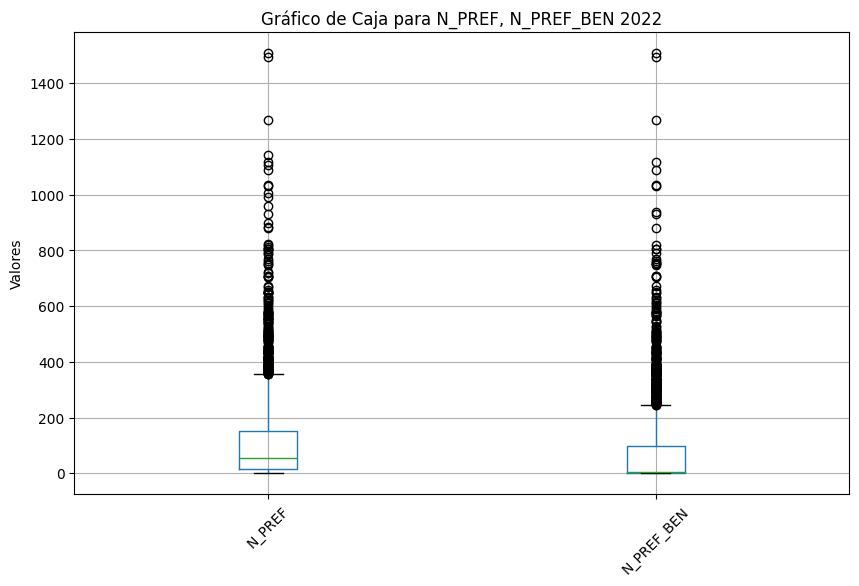

In [ ]:
# Crear un gráfico de caja (boxplot) para las columnas seleccionadas
plt.figure(figsize=(10, 6))
df_SEP2022[['N_PREF', 'N_PREF_BEN']].boxplot()
plt.title('Gráfico de Caja para N_PREF, N_PREF_BEN 2022')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

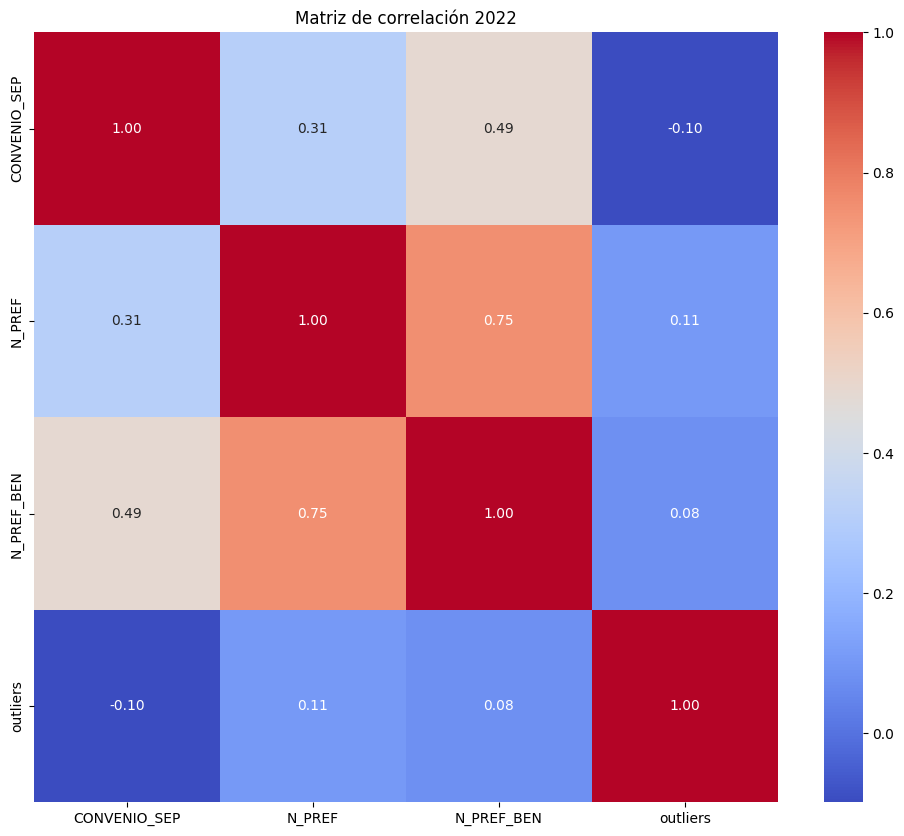

In [ ]:
import seaborn as sns

# Seleccionar las columnas numéricas
numeric_df_SEP2022 = df_SEP2022.select_dtypes(include=np.number)

# Calcular la matriz de correlación
corr_matrix2022 = numeric_df_SEP2022.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix2022, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación 2022')
plt.show()


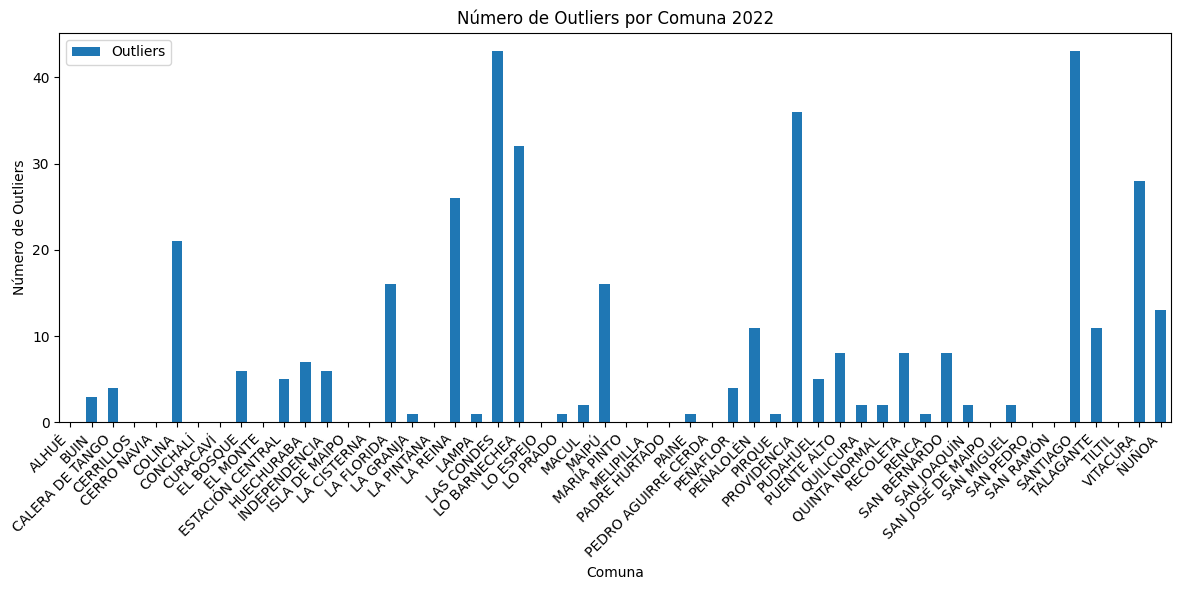

In [ ]:
outliers_grouped2022 = df_SEP2022.groupby("NOM_COM_RBD")[["outliers"]].sum()
outliers_grouped2022.plot(kind="bar", stacked=False, figsize=(12, 6))
plt.xlabel("Comuna")
plt.ylabel("Número de Outliers")
plt.title("Número de Outliers por Comuna 2022")
plt.legend(["Outliers"])

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar que las etiquetas se corten
plt.tight_layout()

plt.show()

In [ ]:
# Filtrar los colegios con al menos un 'N_PREF_BEN' y al menos un outlier en jóvenes
colegios_con_outliers2022 = df_SEP2022[
    (df_SEP2022['N_PREF_BEN'] > 0) &
    ((df_SEP2022['outliers'] > 0))
]['RBD'].nunique()

# Total de colegios con al menos un 'N_PREF'
total_colegios_con_N_PREF2022 = df_SEP2022[df_SEP2022['N_PREF'] > 0]['RBD'].nunique()

# Calcular la fracción del total de colegios con al menos un 'N_PREF' que tienen al menos un outlier
fraccion_colegios_con_outliers2022 = colegios_con_outliers2022 / total_colegios_con_N_PREF2022

# Mostrar resultados
print(f"Colegios con al menos un 'N_PREF' y un outlier: {colegios_con_outliers2022}")
print(f"Total de colegios con al menos un 'N_PREF': {total_colegios_con_N_PREF2022}")
print(f"Fracción de colegios con outliers: {fraccion_colegios_con_outliers2022:.2%}")



Colegios con al menos un 'N_PREF' y un outlier: 37
Total de colegios con al menos un 'N_PREF': 2883
Fracción de colegios con outliers: 1.28%


In [ ]:
df_SEP2023.to_csv('df_SEP2023.csv', index=False)
df_SEP2022.to_csv('df_SEP2022.csv', index=False)